In [1]:
# ===================================================================================================
# [1-1] 모듈 로딩
# ===================================================================================================
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
pd.set_option('mode.copy_on_write', True)

# ===================================================================================================
# [1-2] 데이터 로드
# ===================================================================================================
filename = './Data/house.csv'
dataDF = pd.read_csv(filename)

print(f"데이터 크기: {dataDF.shape}")
display(dataDF.head())

# 원본 보존을 위해 복사본 생성
houseDF = dataDF.copy()
print(houseDF.info())

데이터 크기: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [103]:
# ========================================================================================
# 1. 위치 및 지역 정보 (13개 컬럼)
# ========================================================================================
# MSZoning - 용도지역
# LotFrontage - 도로 접면 길이
# LotArea - 대지 면적
# Street - 도로 유형
# Alley - 골목길 유형
# LotShape - 대지 형태
# LandContour - 지형 평탄도
# Utilities - 유틸리티/기반시설
# LotConfig - 대지 배치 형태
# LandSlope - 경사도
# Neighborhood - 지역/이웃
# Condition1 - 근접 조건 (주)
# Condition2 - 근접 조건 (2차)

# ========================================================================================
# 2. 건물 기본 정보 (5개 컬럼)
# ========================================================================================
# MSSubClass - 주택 유형 코드
# BldgType - 건물 유형
# HouseStyle - 주택 스타일
# YearBuilt - 건설 연도
# YearRemodAdd - 개조/증축 연도

# ========================================================================================
# 3. 외부 구조 (지붕, 외벽, 기초) (10개 컬럼)
# ========================================================================================
# RoofStyle - 지붕 유형
# RoofMatl - 지붕 재료
# Exterior1st - 외벽 재료 (1차)
# Exterior2nd - 외벽 재료 (2차)
# MasVnrType - 벽돌 마감 유형
# MasVnrArea - 벽돌 마감 면적
# ExterQual - 외벽 품질
# ExterCond - 외벽 상태
# Foundation - 기초 유형

# ========================================================================================
# 4. 지하실 정보 (9개 컬럼)
# ========================================================================================
# BsmtQual - 지하실 높이/품질
# BsmtCond - 지하실 상태
# BsmtExposure - 지하실 노출도
# BsmtFinType1 - 지하실 완성 유형 (1차)
# BsmtFinSF1 - 지하실 완성 면적 (1차)
# BsmtFinType2 - 지하실 완성 유형 (2차)
# BsmtFinSF2 - 지하실 완성 면적 (2차)
# BsmtUnfSF - 지하실 미완성 면적
# TotalBsmtSF - 지하실 총 면적

# ========================================================================================
# 5. 난방 및 냉방 (3개 컬럼)
# ========================================================================================
# Heating - 난방 유형
# HeatingQC - 난방 품질
# CentralAir - 중앙 에어컨 설치 여부

# ========================================================================================
# 6. 전기 시스템 (1개 컬럼)
# ========================================================================================
# Electrical - 전기 시스템 유형

# ========================================================================================
# 7. 생활 공간 (4개 컬럼)
# ========================================================================================
# 1stFlrSF - 1층 면적
# 2ndFlrSF - 2층 면적
# LowQualFinSF - 낮은 품질 완성 면적
# GrLivArea - 지상 생활 면적

# ========================================================================================
# 8. 욕실 및 침실 (8개 컬럼)
# ========================================================================================
# BsmtFullBath - 지하실 전체 욕실 개수
# BsmtHalfBath - 지하실 반욕실 개수
# FullBath - 지상 전체 욕실 개수
# HalfBath - 지상 반욕실 개수
# BedroomAbvGr - 지상 침실 개수
# KitchenAbvGr - 지상 부엌 개수
# KitchenQual - 부엌 품질
# TotRmsAbvGrd - 지상 전체 방 개수 (욕실 제외)

# ========================================================================================
# 9. 기능성 및 편의시설 (3개 컬럼)
# ========================================================================================
# Functional - 기능성 등급
# Fireplaces - 벽난로 개수
# FireplaceQu - 벽난로 품질

# ========================================================================================
# 10. 차고 정보 (8개 컬럼)
# ========================================================================================
# GarageType - 차고 위치 유형
# GarageYrBlt - 차고 건설 연도
# GarageFinish - 차고 완성도
# GarageCars - 차고 수용 자동차 개수
# GarageArea - 차고 면적
# GarageQual - 차고 품질
# GarageCond - 차고 상태
# PavedDrive - 진입로 포장 상태

# ========================================================================================
# 11. 야외 공간 (5개 컬럼)
# ========================================================================================
# WoodDeckSF - 목재 데크 면적
# OpenPorchSF - 개방형 포치 면적
# EnclosedPorch - 폐쇄형 포치 면적
# 3SsnPorch - 3계절 포치 면적
# ScreenPorch - 스크린 포치 면적

# ========================================================================================
# 12. 수영장 및 기타 시설 (5개 컬럼)
# ========================================================================================
# PoolArea - 수영장 면적
# PoolQC - 수영장 품질
# Fence - 울타리 품질
# MiscFeature - 기타 편의시설
# MiscVal - 기타 편의시설 가치

# ========================================================================================
# 13. 판매 정보 (4개 컬럼)
# ========================================================================================
# MoSold - 판매 월
# YrSold - 판매 연도
# SaleType - 판매 유형
# SaleCondition - 판매 조건

# ========================================================================================
# 14. 품질 및 상태 평가 (2개 컬럼)
# ========================================================================================
# OverallQual - 전반적 품질
# OverallCond - 전반적 상태

# ========================================================================================
# 15. 식별자 및 목표 변수 (2개 컬럼)
# ========================================================================================
# Id - 주택 고유 식별자
# SalePrice - 판매 가격 (목표 변수)

수치형 컬럼 개수: 38
수치형 컬럼: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']



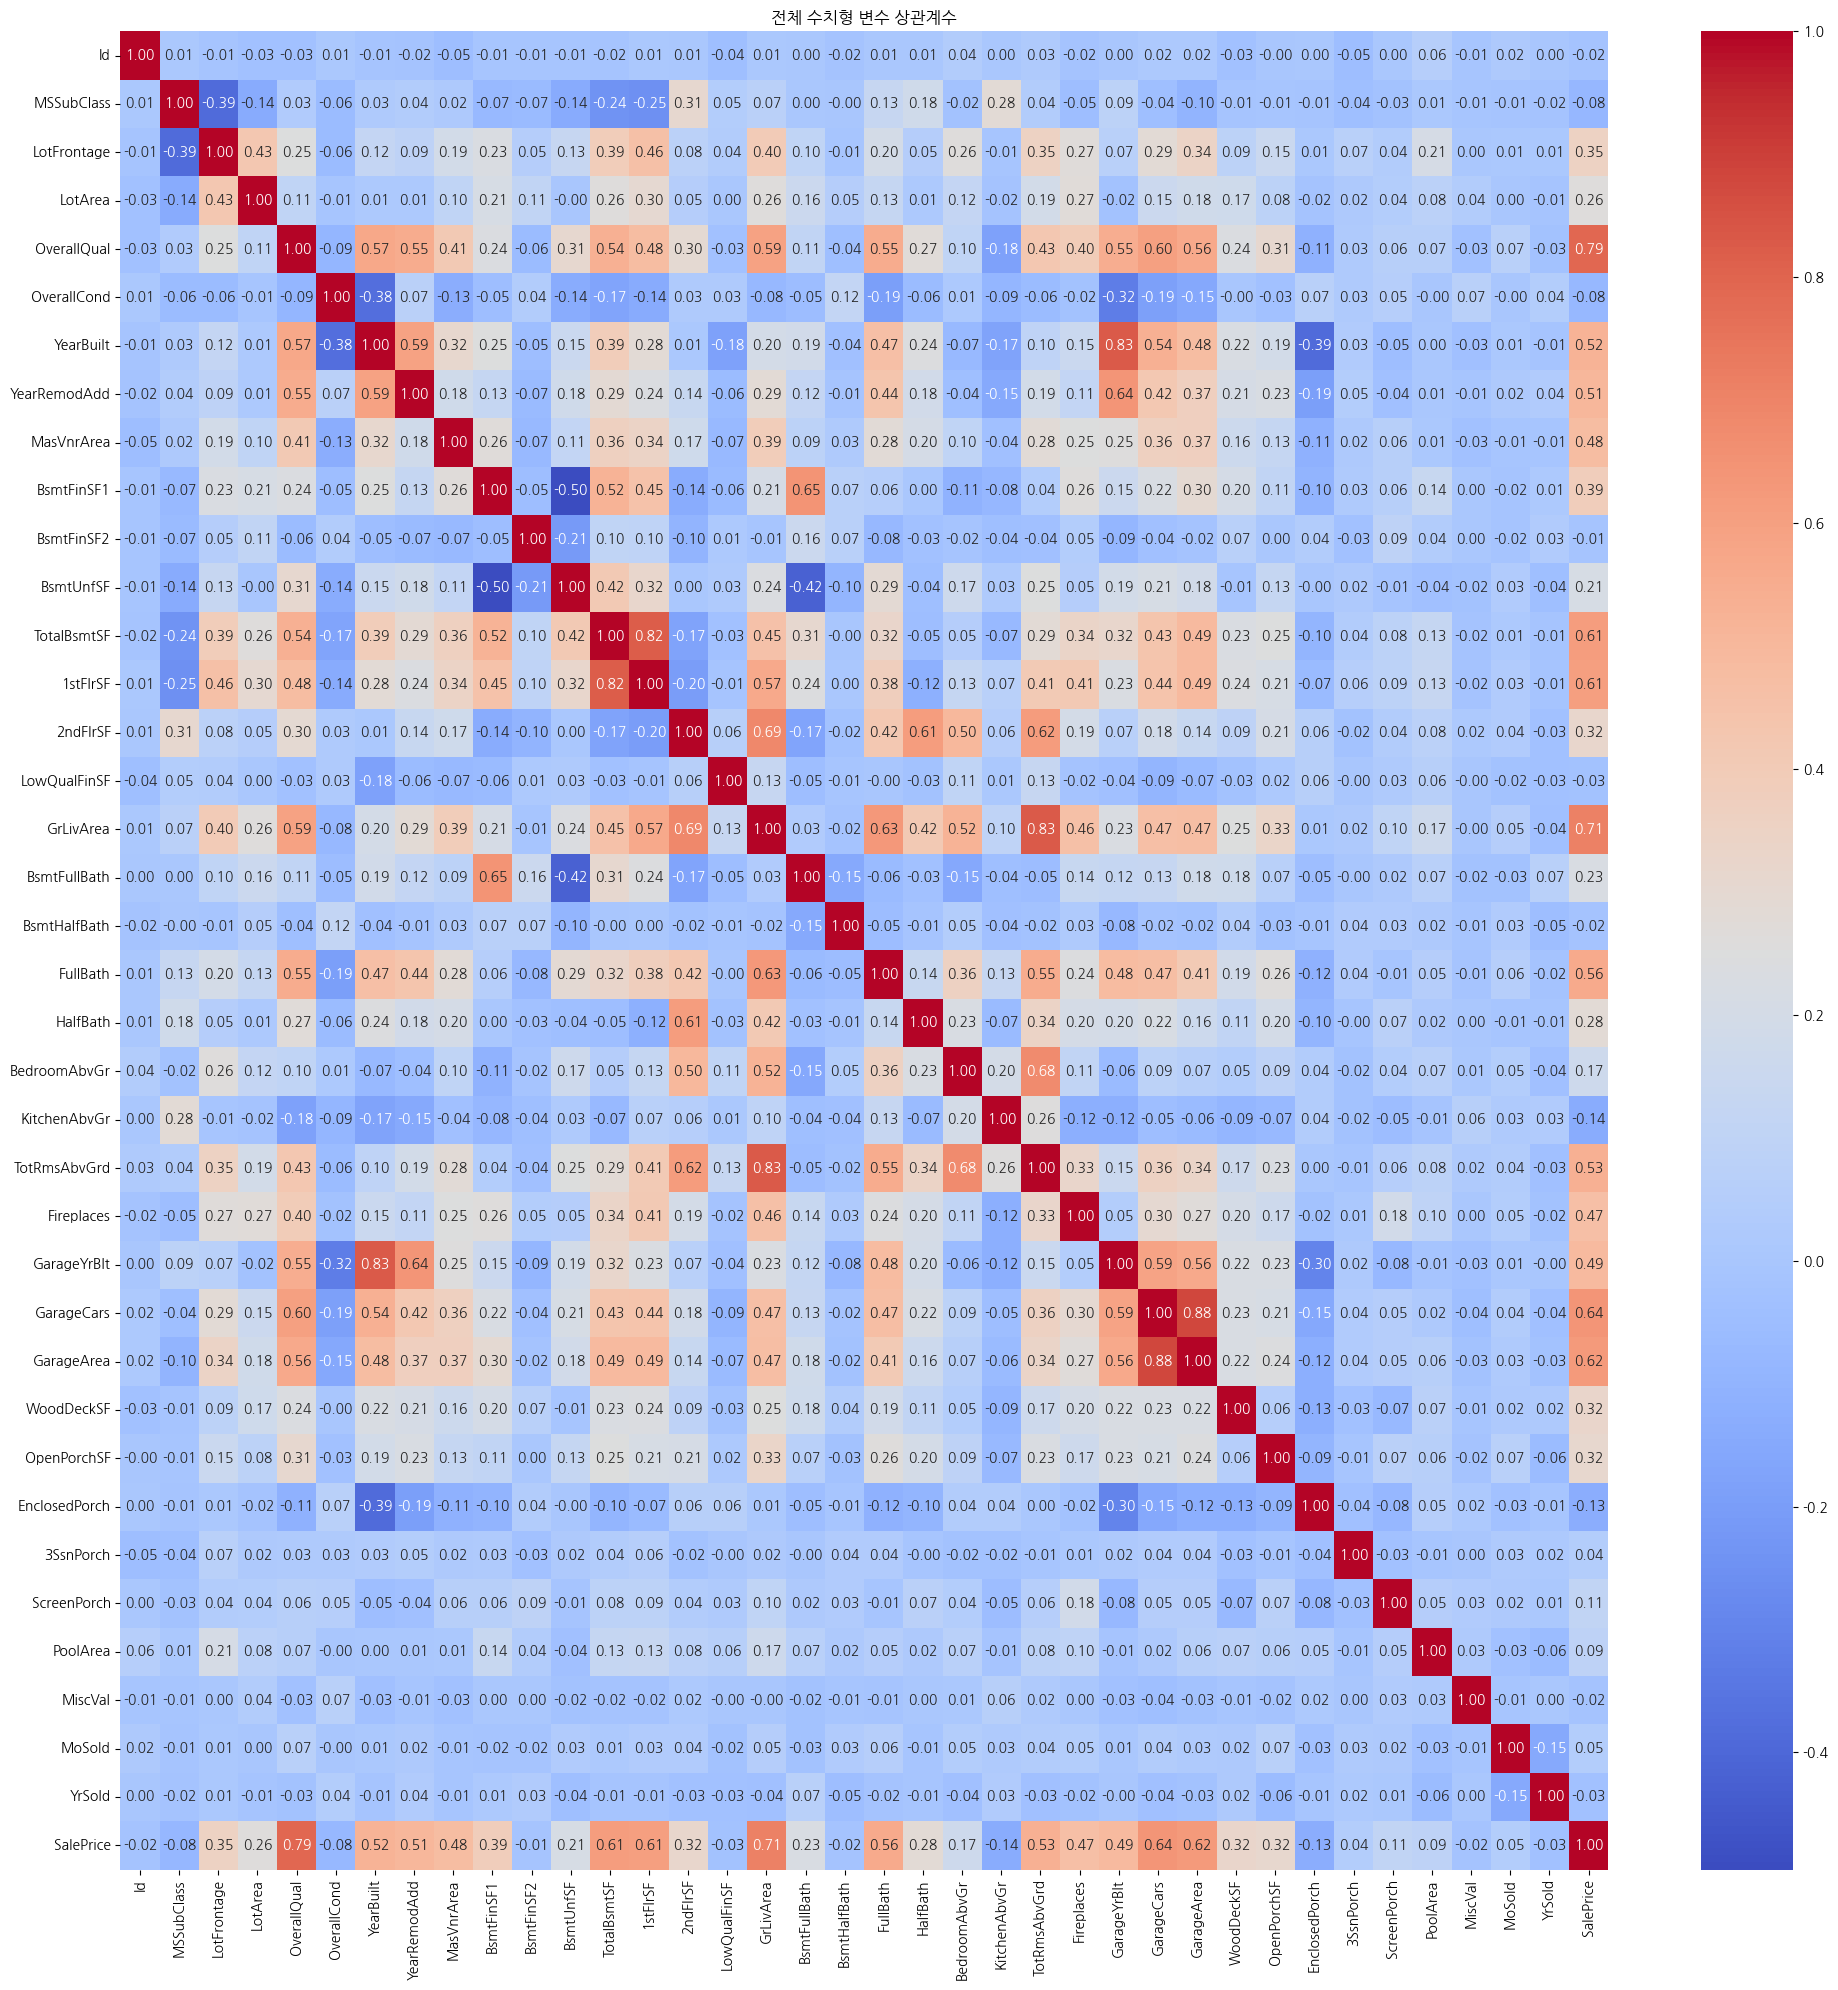

SalePrice와의 상관계수 (0.6 이상):
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

선택된 수치형 피쳐 (0.6 이상): ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']



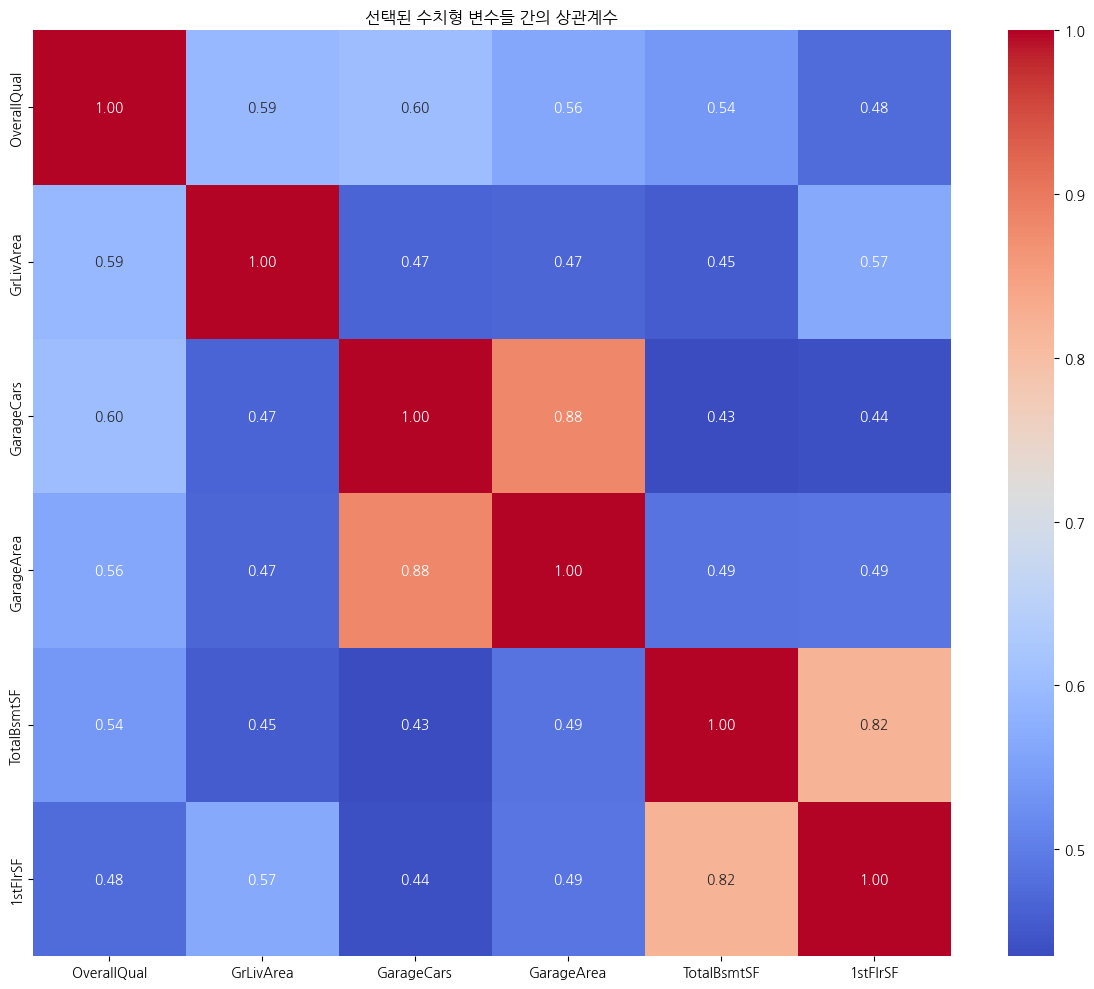

[상관계수 분석 결과]
상관관계가 있는 변수들 (상관계수 >= 0.7):

  GarageCars ↔ GarageArea: 0.882
  TotalBsmtSF ↔ 1stFlrSF: 0.820

최종 선택된 수치형 피쳐: ['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF']


In [104]:
# ===================================================================================================
# [2] 상관관계 분석 및 수치형 변수 선정
# ===================================================================================================

# ======= 수치형 컬럼만 선택 =======
numeric_houseDF = houseDF.select_dtypes(include=[np.number])
print(f"수치형 컬럼 개수: {len(numeric_houseDF.columns)}")
print(f"수치형 컬럼: {numeric_houseDF.columns.tolist()}")
print()


# ======= 히트맵으로 상관관계 보기 =======
corr_matrix = numeric_houseDF.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('전체 수치형 변수 상관계수')
plt.tight_layout()
plt.show()


# ======= 타겟 컬럼(SalePrice)과 상관계수가 0.7 이상인 컬럼 이름만 뽑기 =======
corr_ = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
print("SalePrice와의 상관계수 (0.6 이상):")
print(corr_[corr_ >= 0.6])
print()

highCorr = corr_[corr_ >= 0.6].index.tolist()

# SalePrice 자신 제거
if 'SalePrice' in highCorr:
    highCorr.remove('SalePrice')

print(f"선택된 수치형 피쳐 (0.6 이상): {highCorr}")
print()


# ======= 0.3 이상인 컬럼들끼리 상관계수 분석 =======
corrDF = numeric_houseDF[highCorr]
corr_matrix2 = corrDF.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('선택된 수치형 변수들 간의 상관계수')
plt.tight_layout()
plt.show()


# ======= 상관계수 분석 결과 =======
print("[상관계수 분석 결과]")
print("상관관계가 있는 변수들 (상관계수 >= 0.7):")
print()

# 상관계수가 높은 변수 쌍 찾기
high_corr_pairs = []
for i in range(len(corr_matrix2.columns)):
    for j in range(i+1, len(corr_matrix2.columns)):
        corr_value = corr_matrix2.iloc[i, j]
        if abs(corr_value) >= 0.7:
            col1 = corr_matrix2.columns[i]
            col2 = corr_matrix2.columns[j]
            high_corr_pairs.append((col1, col2, corr_value))
            print(f"  {col1} ↔ {col2}: {corr_value:.3f}")

if len(high_corr_pairs) == 0:
    print("  (상관계수가 0.7 이상인 변수 쌍이 없습니다)")

# 선택된 수치형 피쳐 (0.6 이상): ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

# 결과
# GarageCars ↔ GarageArea: 0.882  ----> GarageArea(차고면적)으로 선택 - 수용 가능 차보다는 면적을 중요할 거 같다고 생각
# TotalBsmtSF ↔ 1stFlrSF: 0.820   ----> 1stFlrSF(1층면적)으로 선택    - 지하실 면적보다는 1층 면적이 중요할 거 같다고 생각

# 최종 선택 변수
top_features = ['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF']
print(f"\n최종 선택된 수치형 피쳐: {top_features}")


In [105]:
# ===================================================================================================
# [3-1] 이상치 분석 및 처리
# ===================================================================================================

# 이상치 분석 함수
def analysis_outlier(data, remove=False, target_col=None):
    
    '''
    이상치 분석 및 선택적 제거 함수
    
    data       : DataFrame - 분석할 데이터
    remove     : bool - True: 제거, False: 분석만
    target_col : str - 제거할 열 이름 (remove=True일 때 필수)
    '''
    # 숫자 데이터만 가져옴(error 방지)
    num_data = data.select_dtypes(include=[np.number])
    
    print("=== 이상치 분석 ===")
    for col in num_data.columns:
        
        # 사분위수
        q1, q3 = data[col].quantile([0.25, 0.75])
        iqr = q3 - q1

        # 하한/상한
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        
        # 이상치
        mask = (data[col] < lower) | (data[col] > upper)
        outliers = data[mask][col]
        
        upper_out = data[data[col] > upper][col]
        lower_out = data[data[col] < lower][col]
        
        # 출력
        print(f"【{col}】 범위: [{lower:.2f}, {upper:.2f}]")
        print(f"  이상치: {len(outliers)}개 (상한: {len(upper_out)}, 하한: {len(lower_out)})")
        # if len(outliers) > 0:
        #     print(f"  값: {sorted(outliers.values)}")

        # 제거
        if remove and col == target_col:
            before = len(data)
            cleanDF = data[(data[col] >= lower) & (data[col] <= upper)]
            after = len(cleanDF)
            print(f"  ✓ 제거됨: {before}행 → {after}행")

        print()

    return cleanDF if remove else None

print(analysis_outlier(houseDF[top_features]))
print(houseDF[top_features].info())

# GrLivArea 컬럼 - 집이 초거대평수인데 각격이 낮으면 이상하다 -> 이상치 처리
outliers_idx = houseDF[(houseDF['GrLivArea'] > 4000) & (houseDF['SalePrice'] < 200000)].index
houseDF.drop(outliers_idx, inplace=True)
print(f"\nGrLivArea 이상치 {len(outliers_idx)}개 제거 완료\n")

print(analysis_outlier(houseDF[top_features]))
print(houseDF[top_features].info())

=== 이상치 분석 ===
【OverallQual】 범위: [2.00, 10.00]
  이상치: 2개 (상한: 0, 하한: 2)

【GrLivArea】 범위: [158.62, 2747.62]
  이상치: 31개 (상한: 31, 하한: 0)

【GarageArea】 범위: [-27.75, 938.25]
  이상치: 21개 (상한: 21, 하한: 0)

【1stFlrSF】 범위: [118.12, 2155.12]
  이상치: 20개 (상한: 20, 하한: 0)

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageArea   1460 non-null   int64
 3   1stFlrSF     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB
None

GrLivArea 이상치 2개 제거 완료

=== 이상치 분석 ===
【OverallQual】 범위: [2.00, 10.00]
  이상치: 2개 (상한: 0, 하한: 2)

【GrLivArea】 범위: [157.25, 2747.25]
  이상치: 29개 (상한: 29, 하한: 0)

【GarageArea】 범위: [-35.25, 942.75]
  이상치: 20개 (상한: 20, 하한: 0)

【1stFlrSF】 범위: [118.88, 2153.88]
  이상치: 18개 (상한: 18, 하한: 0)

None
<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 

In [106]:
# ===================================================================================================
# [4] 관련 있을 거 같은 범주형 변수 선택
# ===================================================================================================
important_categorical = [
    'MSZoning', 'OverallCond', 'KitchenQual', 'GarageType', 'SaleCondition'
]

# 1. MSZoning (토지 용도)
# 고유값: RL(저밀도 주거), RM(중밀도 주거), C (all)(상업), FV(수상가옥 마을), RH(고밀도 주거)
# 의미: 이 집이 지어진 땅이 법적으로 어떤 목적으로 허가받았는지 나타냅니다.
# 집값 관련성: [땅값의 척도]
# RL(단독주택지)은 보통 마당이 넓고 쾌적하여 가장 선호도가 높고 가격이 비쌉니다.
# RM이나 C 지역은 소음이 많거나 대지 지분이 적어 상대적으로 가격이 낮을 수 있습니다.

# 2. OverallCond (전반적인 상태 등급)
# 고유값: 1~9 (숫자가 클수록 좋음)
# 의미: 집이 얼마나 잘 관리되고 유지보수 되었는지(낡았는지 여부)를 나타냅니다.
# 집값 관련성: [감가상각]
# **5점(중간)**이 기준입니다.
# 자재가 아무리 좋아도(OverallQual이 높아도) 관리가 안 되어 OverallCond가 낮으면 리모델링 비용 때문에 집값이 폭락합니다.

# 3. KitchenQual (주방 품질)
# 고유값: Ex, Gd, TA, Fa
# 의미: 주방 가구, 싱크대 등의 수준과 상태입니다.
# 집값 관련성: [리모델링 비용 1순위]
# 부동산 가격 결정의 핵심입니다. 주방 공사비가 가장 비싸기 때문에, Ex나 Gd 등급 주방을 가진 집은 투자 가치가 매우 높게 평가되어 비싸게 팔립니다.

# 4. SaleCondition (판매 조건)
# 고유값: Normal(일반), Abnorml(비정상/급매), Partial(신축 분양 미완공), Family(가족 거래) 등
# 의미: 거래 당시의 특수 상황입니다.
# 집값 관련성: [가격 왜곡 설명]
# Partial(신축)은 보통 새 집 프리미엄으로 가격이 높습니다.
# Abnorml(경매, 급매 등)이나 Family는 집 상태가 좋아도 시세보다 훨씬 싸게 거래될 수 있어, 데이터의 이상 가격을 설명하는 데 필수적입니다.

In [107]:
# ===================================================================================================
# [5] 최종 데이터셋 구성 (X, y)
# ===================================================================================================
# 수치형(Top features) + 범주형(Selected)
final_features = top_features + important_categorical


featureDF = houseDF[final_features]
targetSR = houseDF['SalePrice']


print(f"\n최종 데이터 shape: featureDF{featureDF.shape}, targetSR{targetSR.shape}")


# 훈련/테스트 분리
x_train, x_test, y_train, y_test = train_test_split(
    featureDF, 
    targetSR, 
    test_size=0.2, 
    random_state=42
)

print(featureDF.info())


최종 데이터 shape: featureDF(1458, 9), targetSR(1458,)
<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1458 non-null   int64 
 1   GrLivArea      1458 non-null   int64 
 2   GarageArea     1458 non-null   int64 
 3   1stFlrSF       1458 non-null   int64 
 4   MSZoning       1458 non-null   object
 5   OverallCond    1458 non-null   int64 
 6   KitchenQual    1458 non-null   object
 7   GarageType     1377 non-null   object
 8   SaleCondition  1458 non-null   object
dtypes: int64(5), object(4)
memory usage: 113.9+ KB
None


In [108]:
# ===================================================================================================
# [6] 파이프라인 구축
# ===================================================================================================
# 컬럼 자동 분류
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns.tolist()


# 수치형 데이터 전처리기
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 범주형 데이터 전처리기
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 수치형 + 범주형 전처리기 통합
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 릿지 회귀 모델 파이프라인
ridgeModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10.0))
])

# 랜덤 포레스트 모델 파이프라인 
rfModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

============ 모델 평가 ============
[Ridge] R2: 0.8338, RMSE: 30296.21


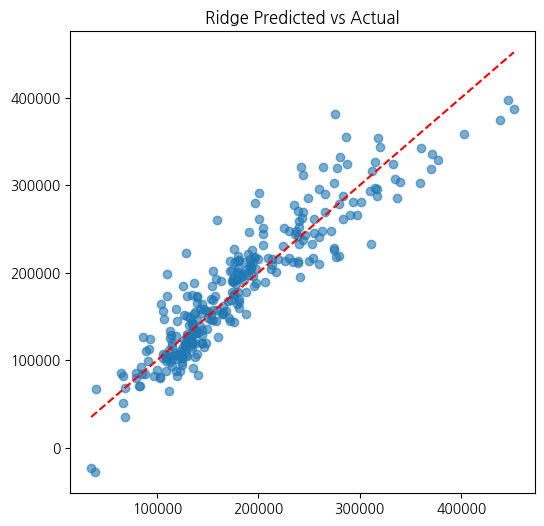

[Random Forest] R2: 0.8526, RMSE: 28530.04


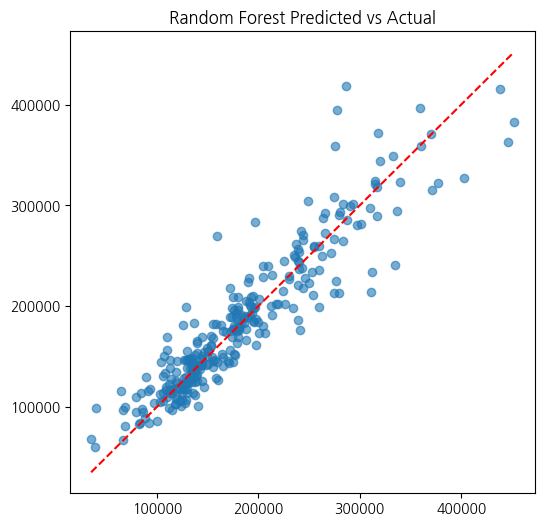


최적 모델 선정: Random Forest (R2: 0.8526)


In [109]:
# ===================================================================================================
# [7] 평가 및 시각화
# ===================================================================================================
def evaluate_and_plot(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"[{model_name}] R2: {r2:.4f}, RMSE: {rmse:.2f}")
    
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{model_name} Predicted vs Actual')
    plt.show()
    
    return r2


print("============ 모델 평가 ============")
ridgeR2 = evaluate_and_plot(ridgeModel, x_train, y_train, x_test, y_test, "Ridge")
rfR2 = evaluate_and_plot(rfModel, x_train, y_train, x_test, y_test, "Random Forest")

#  Best Model 선정 로직 
if rfR2 > ridgeR2:
    best_model = rfModel
    best_name = "Random Forest"
else:
    best_model = ridgeModel
    best_name = "Ridge"

print(f"\n최적 모델 선정: {best_name} (R2: {max(rfR2, ridgeR2):.4f})")


[최종 예측 분석]

[예측 통계]
MAE: $19,563.84
MAPE: 12.04%
Median Absolute Error(오차의 중앙값): $14,036.60
표준편차: $28,529.54

[상위 10개 예측 결과]
  실제가격   예측가격     오차    오차율(%)
190000 224017 -34017 17.903947
100000  86326  13674 13.674000
115000 113912   1087  0.945513
159000 145094  13906  8.745912
315500 324609  -9109  2.887173
137500 151333 -13833 10.060937
311500 214573  96926 31.116019
310000 297922  12077  3.895981
281000 293920 -12920  4.598110
135500 143814  -8314  6.136295


C:\Users\khw27\AppData\Local\Temp\ipykernel_27432\6234204.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_error_by_price = predictionsDF.groupby(price_bins)['오차'].mean()
C:\Users\khw27\AppData\Local\Temp\ipykernel_27432\6234204.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels([f'${int(interval.left/1000)}-{int(interval.right/1000)}K'


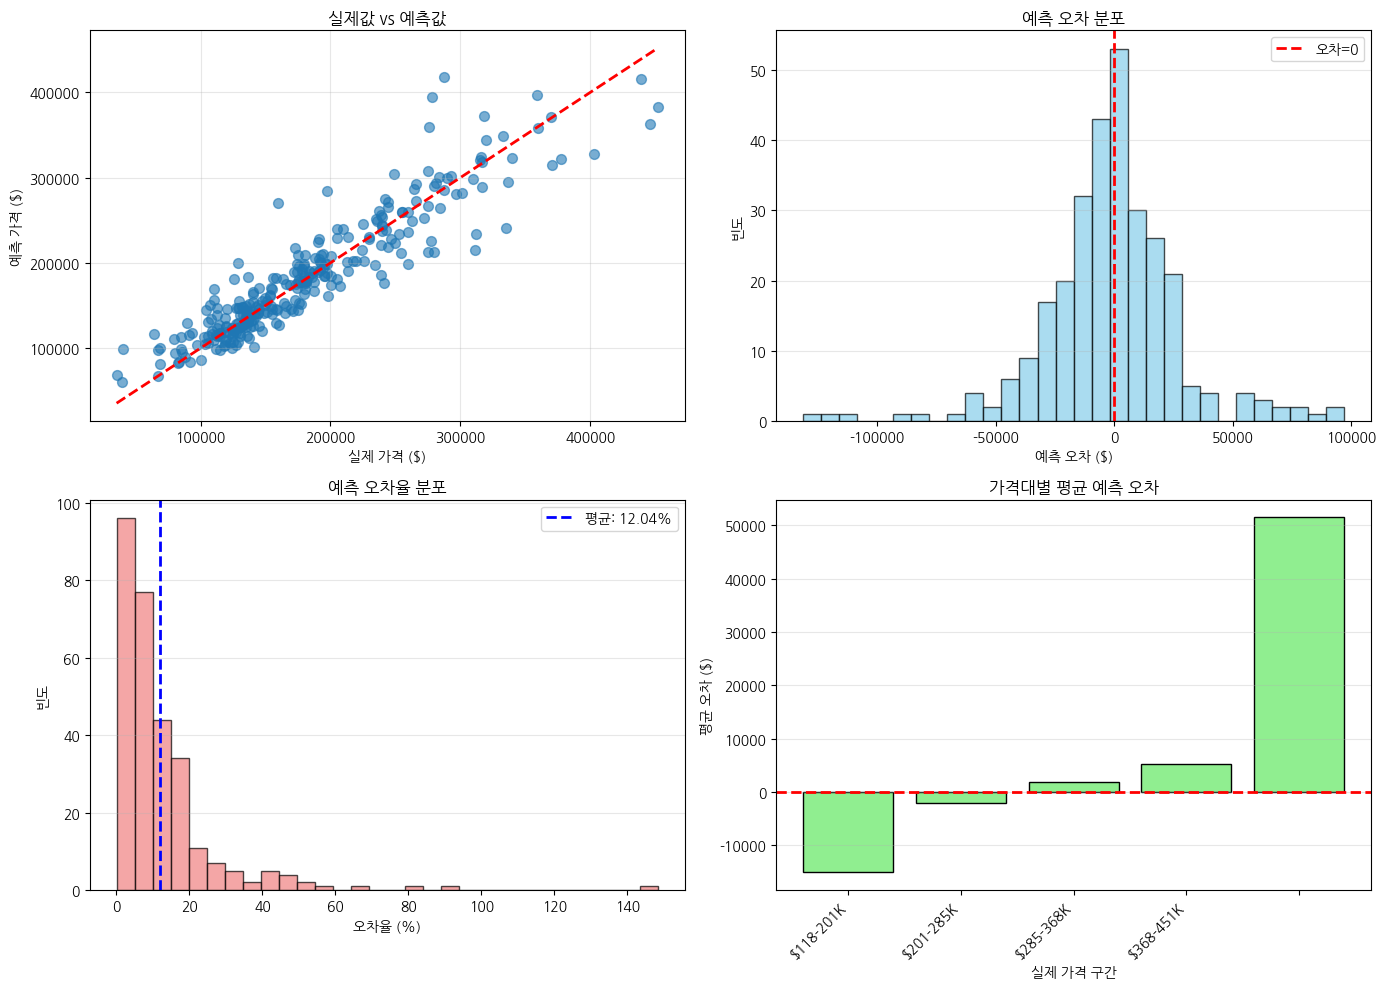

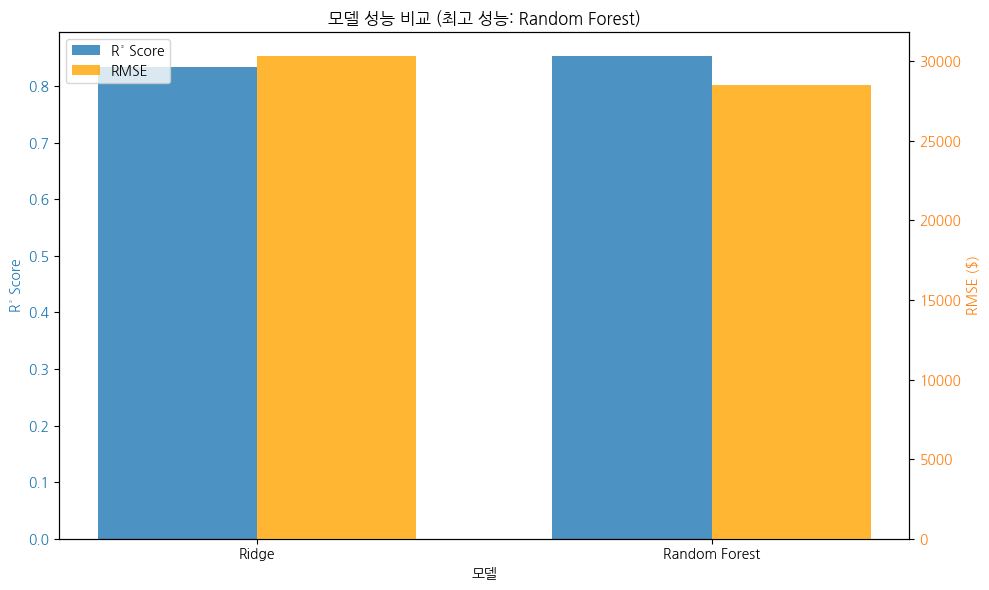


[모델 선정 결과]
✓ 최적 모델: Random Forest
✓ R² Score: 0.8526
✓ RMSE: $28,530.04
✓ 평균 절대 오차 (MAE): $19,563.84


In [110]:
# ===================================================================================================
# [8] 최종 예측 분석
# ===================================================================================================
print("\n" + "="*60)
print("[최종 예측 분석]")
print("="*60)

# 테스트셋 예측
y_pred_test = best_model.predict(x_test)

# 예측 결과 데이터프레임 생성
predictionsDF = pd.DataFrame({
    # 실제 정답
    '실제가격': y_test.values,  
    # 모델 예측값
    '예측가격': y_pred_test,
    # 얼마 차이나는지 (양수면 싸게 예측, 음수면 비싸게 예측)   
    '오차': y_test.values - y_pred_test,   
    # 오차가 실제 가격의 몇 %인지 
    '오차율(%)': np.abs(y_test.values - y_pred_test) / y_test.values * 100
})

# 통계 요약
print("\n[예측 통계]")

# 평균적으로 절대값 얼마($)나 틀렸는지?
print(f"MAE: ${predictionsDF['오차'].abs().mean():,.2f}")

# 평균적으로 몇 퍼센트(%)나 틀렸는지?
print(f"MAPE: {predictionsDF['오차율(%)'].mean():.2f}%")

# 오차의 중앙값은 얼마인지?
print(f"Median Absolute Error(오차의 중앙값): ${predictionsDF['오차'].abs().median():,.2f}")
print(f"표준편차: ${predictionsDF['오차'].std():,.2f}")

# 예측값과 실제값 비교 (상위 10개)
print("\n[상위 10개 예측 결과]")
top_10_predictions = predictionsDF.head(10).copy()
top_10_predictions['실제가격'] = top_10_predictions['실제가격'].astype(int)
top_10_predictions['예측가격'] = top_10_predictions['예측가격'].astype(int)
top_10_predictions['오차'] = top_10_predictions['오차'].astype(int)
print(top_10_predictions.to_string(index=False))

# 예측 오류 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 실제값 vs 예측값 (산점도)
axes[0, 0].scatter(predictionsDF['실제가격'], predictionsDF['예측가격'], alpha=0.6, s=50)
axes[0, 0].plot([predictionsDF['실제가격'].min(), predictionsDF['실제가격'].max()],
                [predictionsDF['실제가격'].min(), predictionsDF['실제가격'].max()], 'r--', lw=2)
axes[0, 0].set_xlabel('실제 가격 ($)')
axes[0, 0].set_ylabel('예측 가격 ($)')
axes[0, 0].set_title('실제값 vs 예측값')
axes[0, 0].grid(True, alpha=0.3)

# 2. 오차 분포
axes[0, 1].hist(predictionsDF['오차'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='오차=0')
axes[0, 1].set_xlabel('예측 오차 ($)')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].set_title('예측 오차 분포')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. 오차율 분포
axes[1, 0].hist(predictionsDF['오차율(%)'], bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1, 0].axvline(x=predictionsDF['오차율(%)'].mean(), color='blue', linestyle='--', linewidth=2, 
                   label=f"평균: {predictionsDF['오차율(%)'].mean():.2f}%")
axes[1, 0].set_xlabel('오차율 (%)')
axes[1, 0].set_ylabel('빈도')
axes[1, 0].set_title('예측 오차율 분포')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. 실제가격 구간별 평균 오차
price_bins = pd.cut(predictionsDF['실제가격'], bins=5)
mean_error_by_price = predictionsDF.groupby(price_bins)['오차'].mean()
axes[1, 1].bar(range(len(mean_error_by_price)), mean_error_by_price.values, color='lightgreen', edgecolor='black')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('실제 가격 구간')
axes[1, 1].set_ylabel('평균 오차 ($)')
axes[1, 1].set_title('가격대별 평균 예측 오차')
axes[1, 1].set_xticklabels([f'${int(interval.left/1000)}-{int(interval.right/1000)}K' 
                             for interval in mean_error_by_price.index], rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 모델 성능 비교 시각화
fig, ax = plt.subplots(figsize=(10, 6))

models_perf = pd.DataFrame({
    '모델': ['Ridge', 'Random Forest'],
    'R² Score': [ridgeR2, rfR2],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, ridgeModel.predict(x_test))),
        np.sqrt(mean_squared_error(y_test, rfModel.predict(x_test)))
    ]
})

x_pos = np.arange(len(models_perf))
width = 0.35

ax.bar(x_pos - width/2, models_perf['R² Score'], width, label='R² Score', alpha=0.8)
ax2 = ax.twinx()
ax2.bar(x_pos + width/2, models_perf['RMSE'], width, label='RMSE', color='orange', alpha=0.8)

ax.set_xlabel('모델')
ax.set_ylabel('R² Score', color='tab:blue')
ax2.set_ylabel('RMSE ($)', color='tab:orange')
ax.set_title(f'모델 성능 비교 (최고 성능: {best_name})')
ax.set_xticks(x_pos)
ax.set_xticklabels(models_perf['모델'])
ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 범례 통합
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("[모델 선정 결과]")
print("="*60)
print(f"✓ 최적 모델: {best_name}")
print(f"✓ R² Score: {max(ridgeR2, rfR2):.4f}")
print(f"✓ RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_test)):,.2f}")
print(f"✓ 평균 절대 오차 (MAE): ${predictionsDF['오차'].abs().mean():,.2f}")
print("="*60)